In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt

import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

import warnings as wrn
wrn.filterwarnings("ignore")


In [2]:
dataset = pd.read_csv(r'C:\Users\Gundeep Gulati\Desktop\Language_Identification_dataset\dataset.csv')

In [3]:
dataset.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [4]:
# Splitting X and Y
x = dataset["Text"]
y = dataset["language"]

# Encoding Y 
encoder = LabelEncoder()
y = encoder.fit_transform(y)

print(y[:10])

[ 4 17 19 18  2  8 20 10 21  8]


In [5]:
#print unique languages
print(len(np.unique(y)))

22


In [6]:
# Cleaning and lowering text
def cleanLower(texts):
    
    # This regular expression pattern means everything except alphabetical characters
    pattern = "^[a-zA-Z]"
    cleanText = []
    for text in texts:
        # re.sub(pattern) means replace everything with a space except alphabetical characters
        cleanText.append(re.sub(pattern," ",text).lower())
        
    return cleanText

x = cleanLower(x)
x[:4]

[' lement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke  aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald',
 ' ebes joseph pereira thomas  på eng the jesuits and the sino-russian treaty of nerchinsk  the diary of thomas pereira bibliotheca instituti historici s i --   rome libris ',
 'ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม',
 'விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார்  ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார்  கோவை செம்மொழி மாநாட்டில் "தமிழ்ச்சங்கங்களு

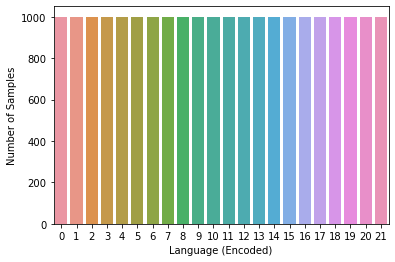

In [7]:
plt.subplots(figsize=(6,4))
sns.countplot(y)
plt.xlabel("Language (Encoded)")
plt.ylabel("Number of Samples")
plt.show()

In [8]:
vectorizer = CountVectorizer(max_features=10000)
x_end = vectorizer.fit_transform(x)

In [9]:
x_end.shape

(22000, 10000)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x_end.toarray(),y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16500, 10000)
(5500, 10000)
(16500,)
(5500,)


In [11]:
start_time = time.time()


model = LogisticRegression(solver='saga',multi_class="ovr")
model.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)

print("Fitting Logistic Regression model took {} seconds".format(process_time))

Fitting Logistic Regression model took 2848.54 seconds


In [12]:
def evalModel(cls,test_set):
    x,y = test_set
    y_pred = cls.predict(x)
    conf_matrix = confusion_matrix(y_pred=y_pred,y_true=y)
    acc = round(accuracy_score(y_pred=y_pred,y_true=y),2) * 100
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix) 
    print("FP",FP)
    
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    print("FN",FN)
    TP = np.diag(conf_matrix)
    print("TP",TP)
    TN = conf_matrix.sum() - (FP + FN + TP)
    print("TN",TN)
    
    TPR = TP/(TP+FN)
    print("TPR",TPR)
    
    TNR = TN/(TN+FP) 
    print("TNR",TNR)
    
    print(f"Accuracy is {acc}%")
    plt.subplots(figsize=(20,20))
    sns.heatmap(conf_matrix,annot=True,fmt=".1f",linewidths=1.5)
    plt.xlabel("Predicted Label",fontsize=20)
    plt.ylabel("True Label",fontsize=20)
    plt.show()

FP [  0  41   0  27   6   9   0   1 257   0  15   0   7   0   0   2   2   0
   0   0   0   0]
FN [  5 174   7   7  17   7   5   5  23  20  22   4   7  10   8  17   7   1
   2   7   5   7]
TP [244  80 261 232 231 232 259 253 227 226 238 238 249 245 239 232 231 228
 251 243 241 253]
TN [5251 5205 5232 5234 5246 5252 5236 5241 4993 5254 5225 5258 5237 5245
 5253 5249 5260 5271 5247 5250 5254 5240]
TPR [0.97991968 0.31496063 0.9738806  0.9707113  0.93145161 0.9707113
 0.98106061 0.98062016 0.908      0.91869919 0.91538462 0.98347107
 0.97265625 0.96078431 0.96761134 0.93172691 0.97058824 0.99563319
 0.99209486 0.972      0.9796748  0.97307692]
TNR [1.         0.99218452 1.         0.9948679  0.99885758 0.9982893
 1.         0.99980923 0.95104762 1.         0.9971374  1.
 0.99866514 1.         1.         0.99961912 0.99961992 1.
 1.         1.         1.         1.        ]
Accuracy is 93.0%


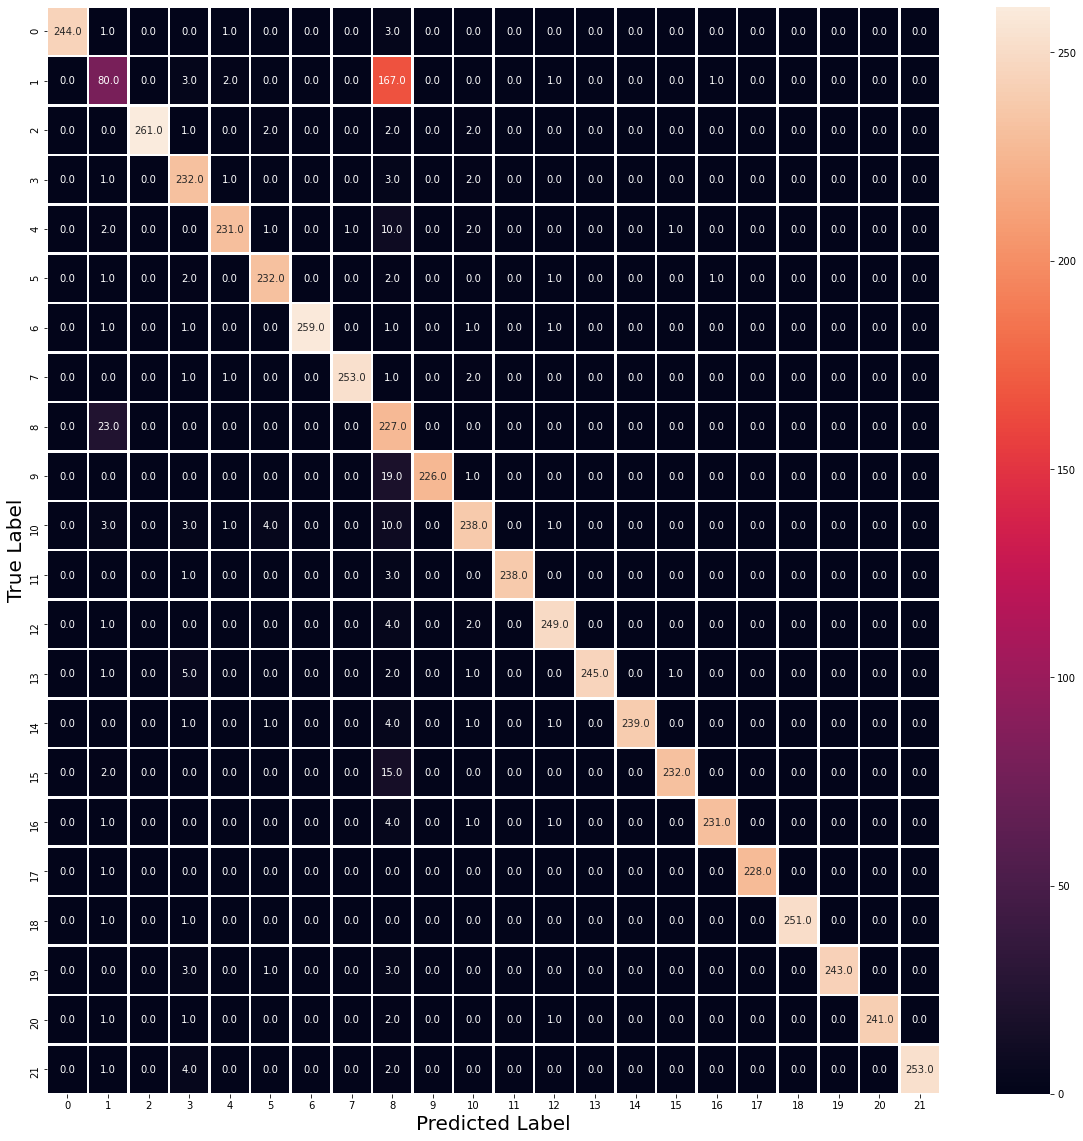

In [13]:
evalModel(model,(x_test,y_test))

In [14]:
encoder.inverse_transform([1,5])

array(['Chinese', 'French'], dtype=object)

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
print('F1 Score: ',f1_score(y_test,model.predict(x_test), average='macro'))
print('Precision Score: ',precision_score(y_test,model.predict(x_test), average='macro'))
print('Recall Score: ',f1_score(y_test,model.predict(x_test), average='macro'))
print('MCC score: ',matthews_corrcoef(y_test,model.predict(x_test), sample_weight=None))

F1 Score:  0.9346438146974204
Precision Score:  0.9479798789097768
Recall Score:  0.9346438146974204
MCC score:  0.931288675702027


In [17]:
from sklearn.metrics import roc_curve, auc


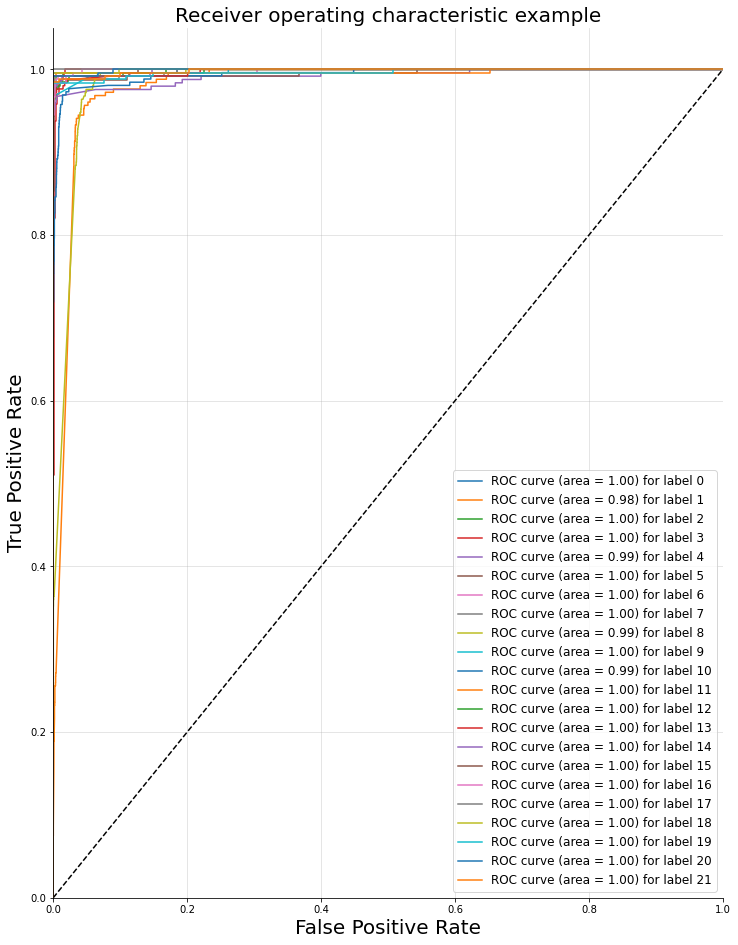

In [18]:
def plot_multiclass_roc(model, x_test, y_test, n_classes, figsize=(17, 6)):
    y_score = model.decision_function(x_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=20)
    ax.set_ylabel('True Positive Rate', fontsize=20)
    ax.set_title('Receiver operating characteristic example',fontsize=20)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best", prop={'size': 12})
    ax.grid(alpha=.4)
    sns.despine()
    plt.savefig("Roc.png",dpi=400)
    plt.show()
    

plot_multiclass_roc(model, x_test, y_test, n_classes=22, figsize=(12, 16))

In [22]:
print(classification_report(model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       244
           1       0.31      0.66      0.43       121
           2       0.97      1.00      0.99       261
           3       0.97      0.90      0.93       259
           4       0.93      0.97      0.95       237
           5       0.97      0.96      0.97       241
           6       0.98      1.00      0.99       259
           7       0.98      1.00      0.99       254
           8       0.91      0.47      0.62       484
           9       0.92      1.00      0.96       226
          10       0.92      0.94      0.93       253
          11       0.98      1.00      0.99       238
          12       0.97      0.97      0.97       256
          13       0.96      1.00      0.98       245
          14       0.97      1.00      0.98       239
          15       0.93      0.99      0.96       234
          16       0.97      0.99      0.98       233
          17       1.00    